## Linear Regression
### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [124]:
df_b = pd.read_csv('day.csv')
df_b

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0             2  14.110847  18.18125  80.5833  10.749882     331         654   
1             2  14.902598  17.68695  69.6087  16.652113     131         670   
2             1   8.050924   9.47025  43.7273  16.636703     120        1229   
3             1   8.200000  10.60610  59.0435  10.739832     108        1454   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
..          ...        ...       ...      ...        ...     ...         ...   
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

In [125]:
df_b.shape #size of data

(730, 16)

In [126]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [127]:
df_b.describe() #describe dataset

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [128]:
df_b.size

11680

## Data Cleaning
### Dropping the columns which are not useful for analysis
- instant: its just record index
- dteday: date feature already there 
- casual and registered is there in cnt column,as it is sum of both the values

In [129]:
df_b.isnull().sum() #any missing values check

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [130]:
df_b.drop(['instant'],axis=1,inplace=True) #dropping instant column 

In [131]:
df_b.drop(['dteday'],axis=1,inplace=True) #dropping dteday column 

In [132]:
df_b.drop(['casual'],axis=1,inplace=True) #dropping casual column 

In [133]:
df_b.drop(['registered'],axis=1,inplace=True) #dropping registered column 

In [134]:
df_b.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [135]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [136]:
df_b.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [137]:
df_b.corr()

season            yr          mnth   holiday   weekday  \
season      1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868 -0.003081   
yr         -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195 -0.005466   
mnth        8.310321e-01 -5.162656e-16  1.000000e+00  0.018905  0.009523   
holiday    -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.101962   
weekday    -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962  1.000000   
workingday  1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948  0.035800   
weathersit  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.031112   
temp        3.333607e-01  4.878919e-02  2.190833e-01 -0.028764 -0.000168   
atemp       3.420139e-01  4.721519e-02  2.264302e-01 -0.032703 -0.007539   
hum         2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662 -0.052290   
windspeed  -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257  0.014283   
cnt         4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.067534   

            workingday  weathersit      temp     atemp       hum  windspeed  \
season        0.013762    0.021306  0.333361  0.342014  0.208220  -0.229607   
yr           -0.002945   -0.050322  0.048789  0.047215 -0.112547  -0.011624   
mnth         -0.004688    0.045613  0.219083  0.226430  0.224937  -0.208013   
holiday      -0.252948   -0.034395 -0.028764 -0.032703 -0.015662   0.006257   
weekday       0.035800    0.031112 -0.000168 -0.007539 -0.052290   0.014283   
workingday    1.000000    0.060236  0.053470  0.052940  0.023202  -0.018666   
weathersit    0.060236    1.000000 -0.119503 -0.120559  0.590277   0.039769   
temp          0.053470   -0.119503  1.000000  0.991696  0.128565  -0.158186   
atemp         0.052940   -0.120559  0.991696  1.000000  0.141512  -0.183876   
hum           0.023202    0.590277  0.128565  0.141512  1.000000  -0.248506   
windspeed    -0.018666    0.039769 -0.158186 -0.183876 -0.248506   1.000000   
cnt           0.062542   -0.295929  0.627044  0.630685 -0.098543  -0.235132   

                 cnt  
season      0.404584  
yr          0.569728  
mnth        0.278191  
holiday    -0.068764  
weekday     0.067534  
workingday  0.062542  
weathersit -0.295929  
temp        0.627044  
atemp       0.630685  
hum        -0.098543  
windspeed  -0.235132  
cnt         1.000000

The correlation above formed states that season,month and weekday which supposed to be non-numerical are numerical which needs to change

### Checking Outliers

In [138]:
df_b.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [139]:
df_b.nunique() # info about any unique values present in data

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

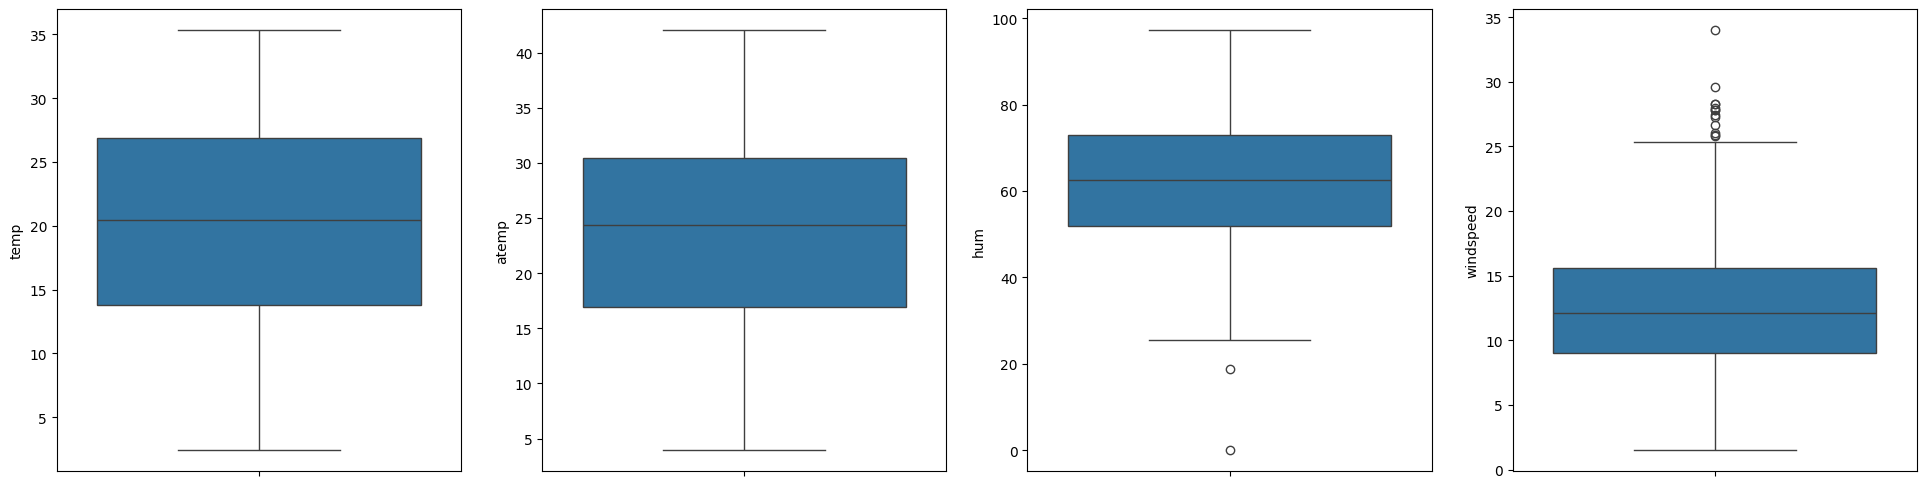

In [140]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(24,6))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df_b)
    i+=1

Thus, it is evident from the graphs above that there are no outliers.

### Exploratory Data Analysis

In [141]:
# converting numerical data into category data for relevant understanding
df_b.season.replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"},inplace = True)

df_b.weathersit.replace({1:'Good',2:'Moderate',3:'Bad',4:'Severe'},inplace = True)

df_b.mnth = df_b.mnth.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',
                  7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

df_b.weekday = df_b.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'})

df_b.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  Spring   0  Jan        0     Sat           0   Moderate  14.110847   
1  Spring   0  Jan        0     Sun           0   Moderate  14.902598   
2  Spring   0  Jan        0     Mon           1       Good   8.050924   
3  Spring   0  Jan        0     Tue           1       Good   8.200000   
4  Spring   0  Jan        0     Wed           1       Good   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

### Pairplots for linear relationship 

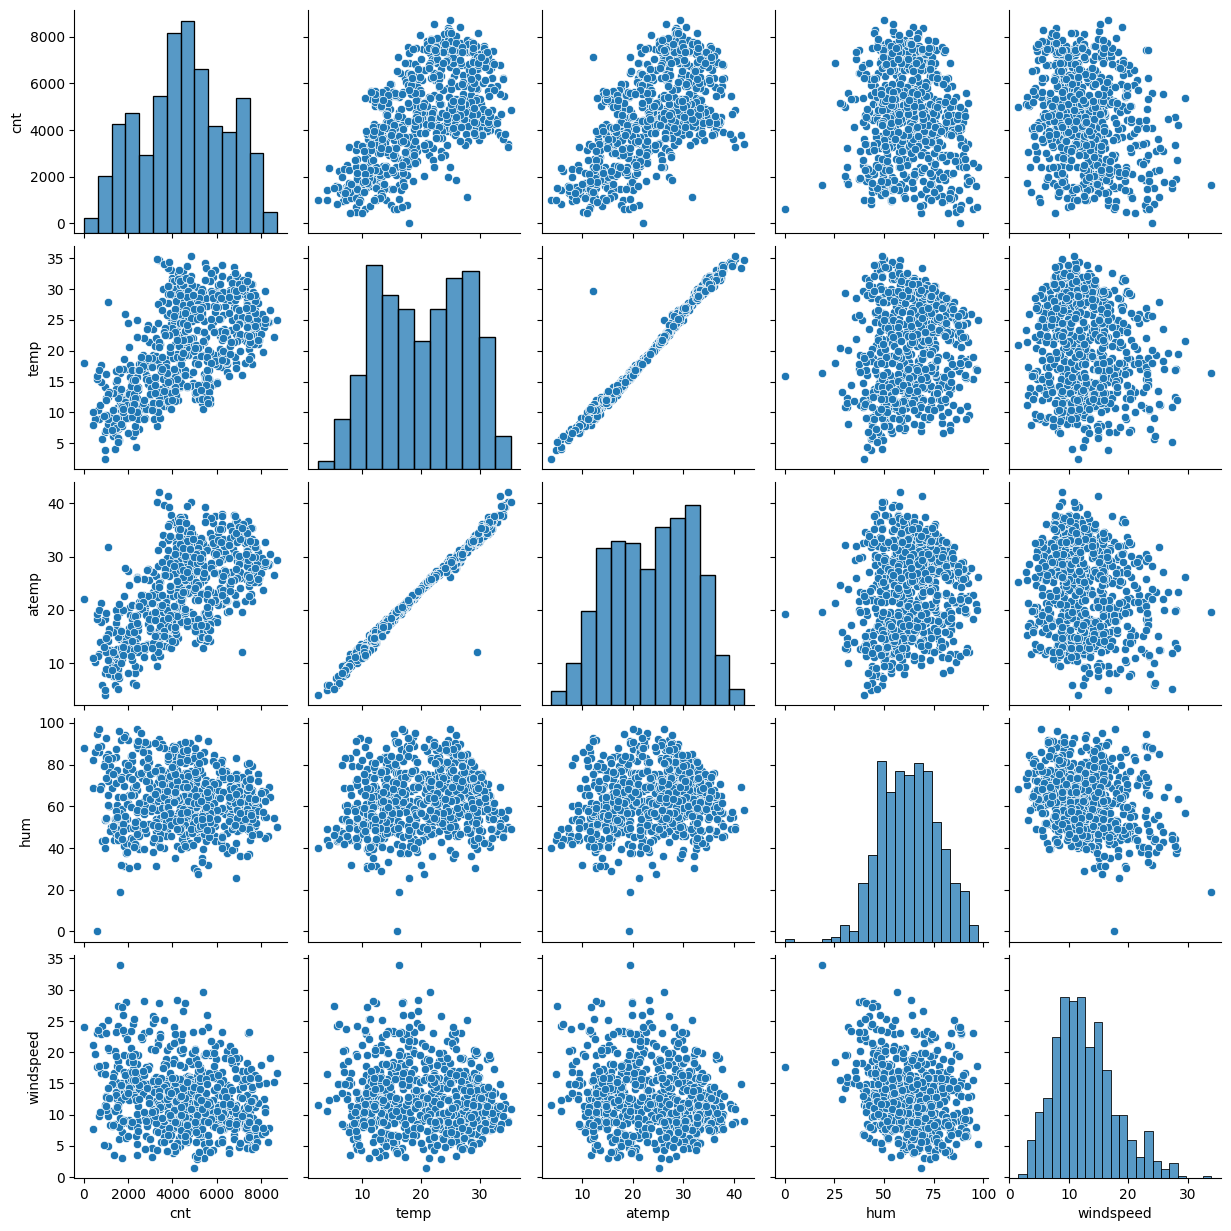

In [142]:
plt.figure
sns.pairplot(data=df_b,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

Therefore, it is evident from the graphs above that temp and atemp have a high correlation. We can also infer from the charts that TEMP and ATEMP have an aligned relationship.

### Using data visualization to identify relationships between numerical variables

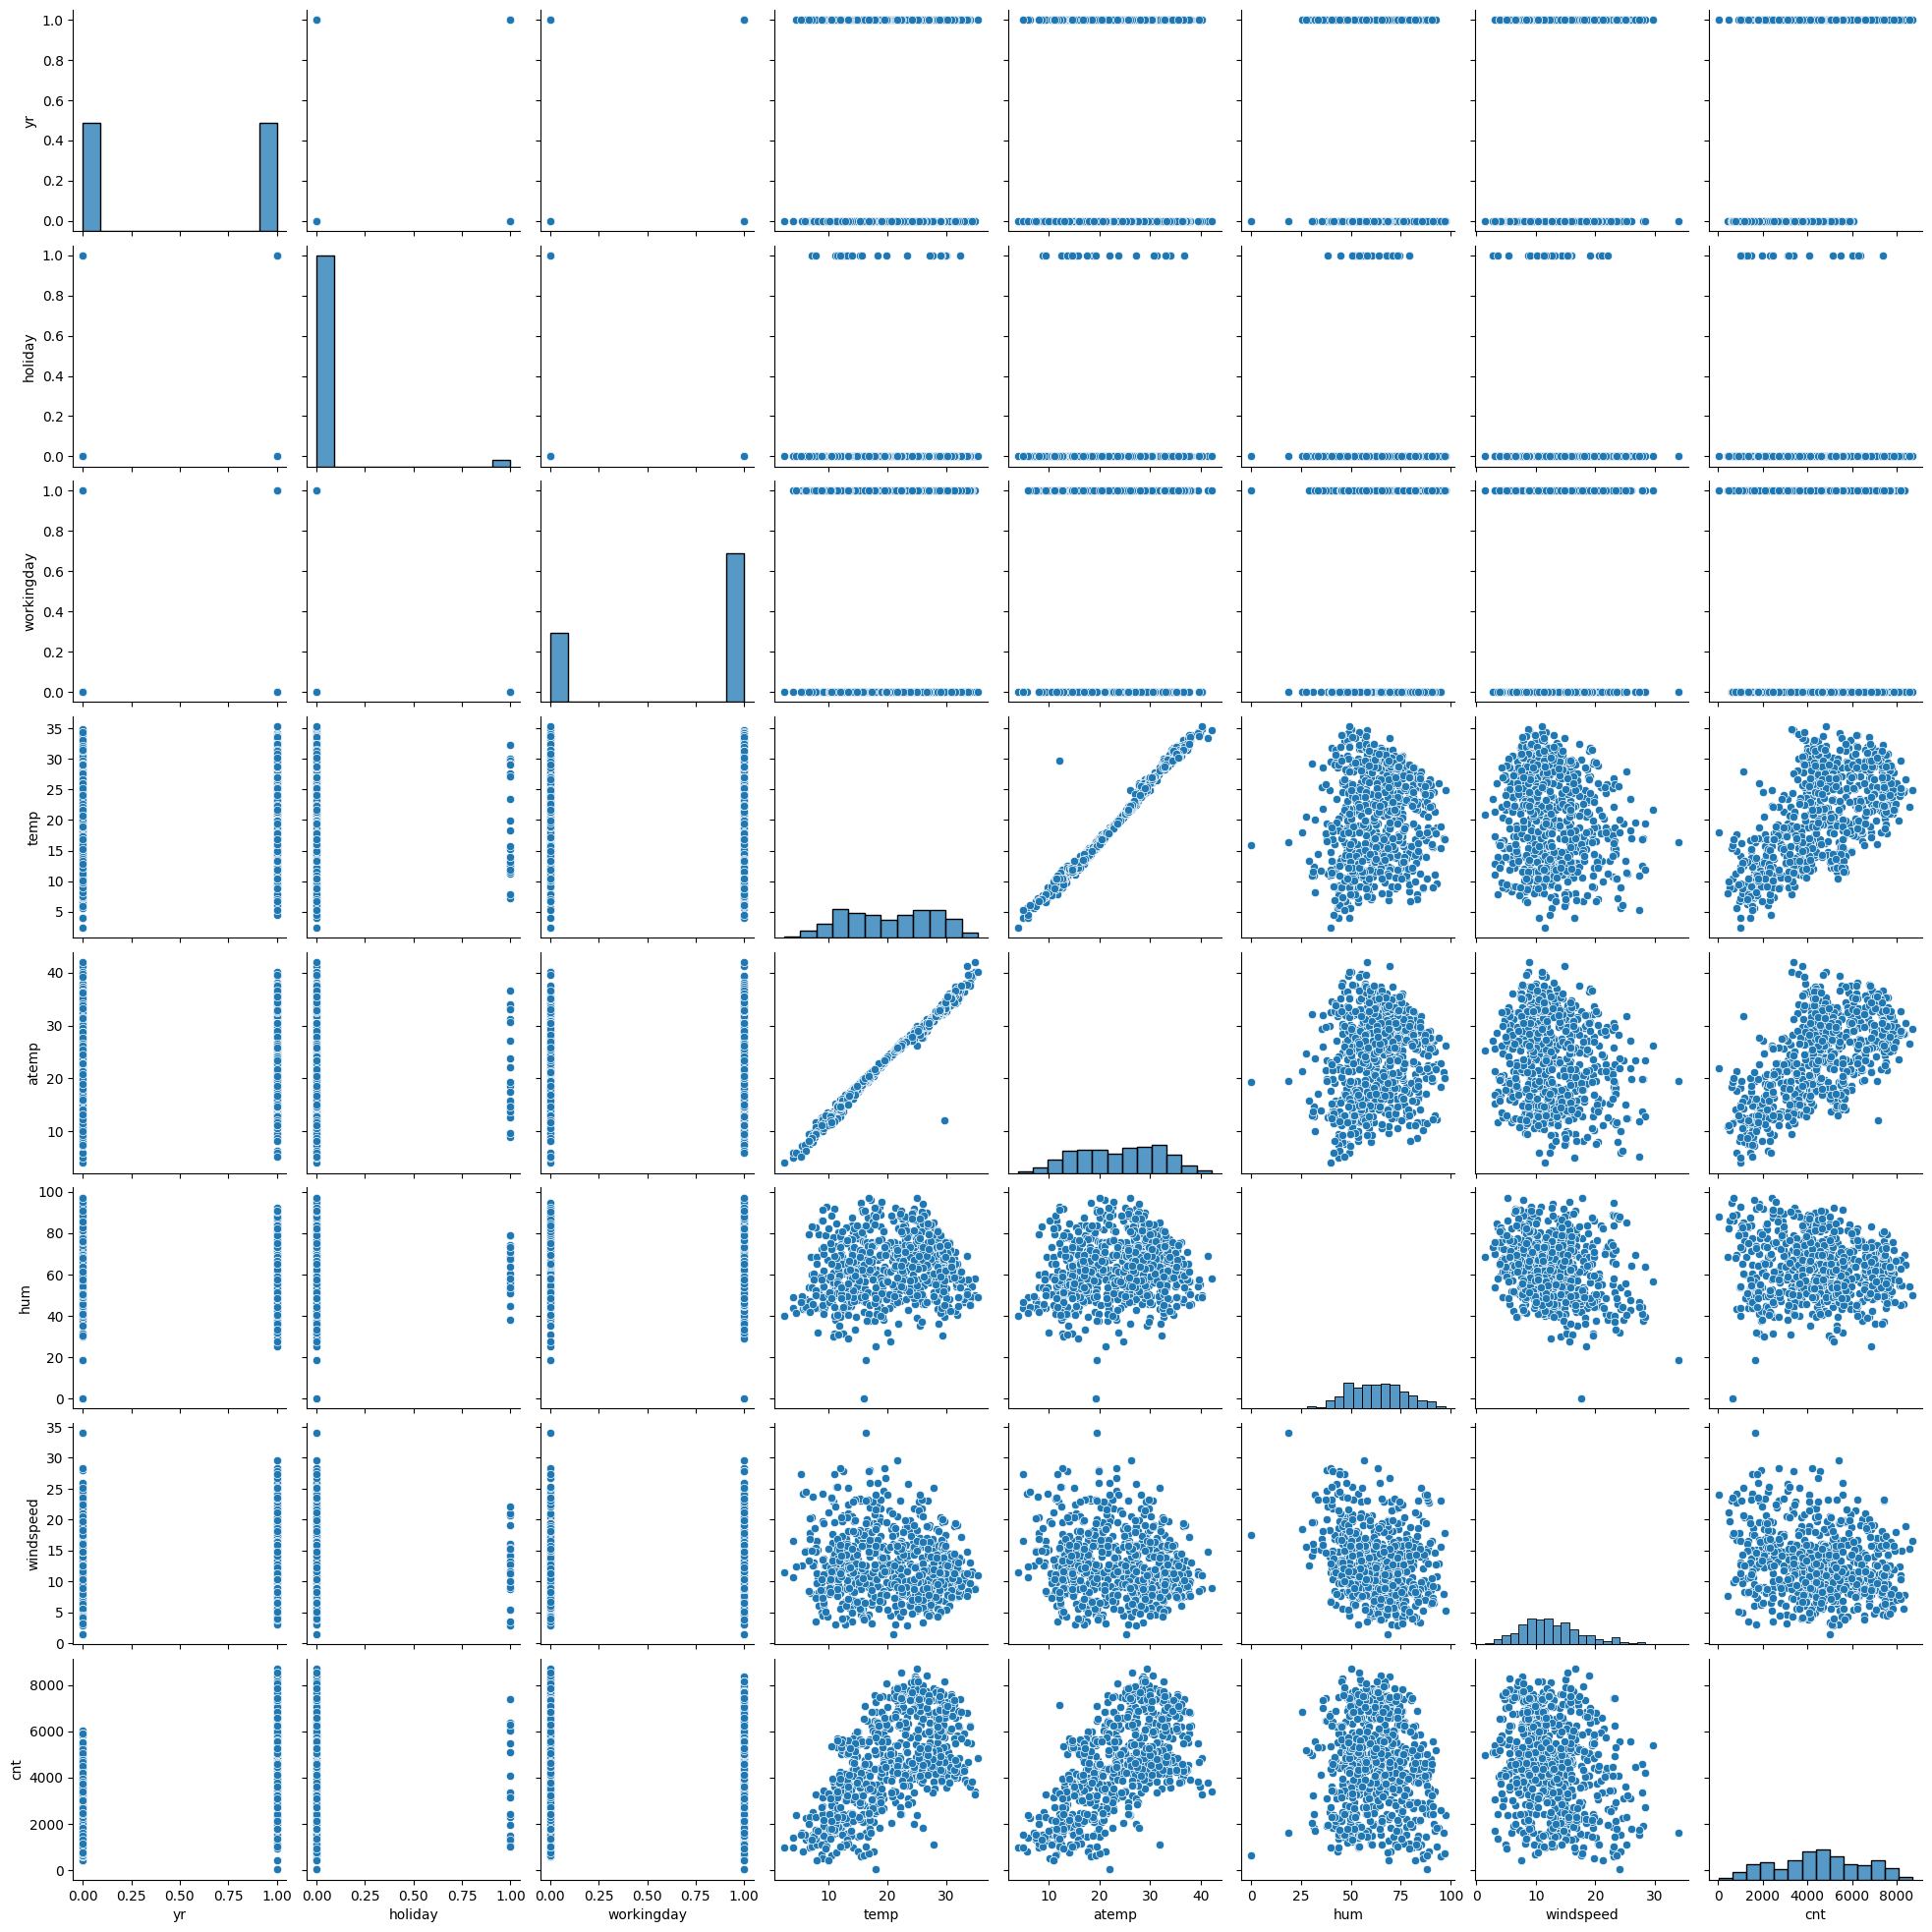

In [143]:
plt.figure
sns.pairplot(df_b)
plt.show()

<Axes: xlabel='weathersit', ylabel='cnt'>

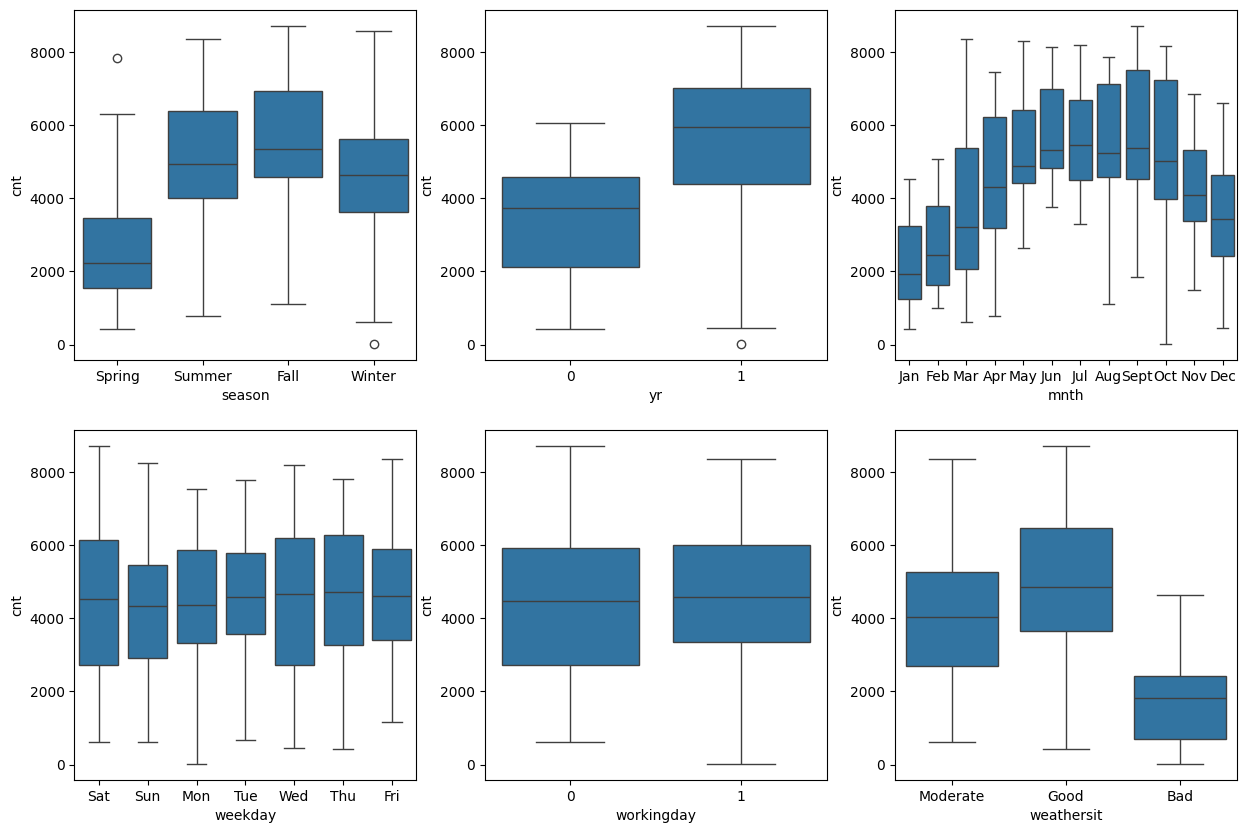

In [144]:
#visualising the categorical variables

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=df_b)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=df_b)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=df_b)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=df_b)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=df_b)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=df_b)

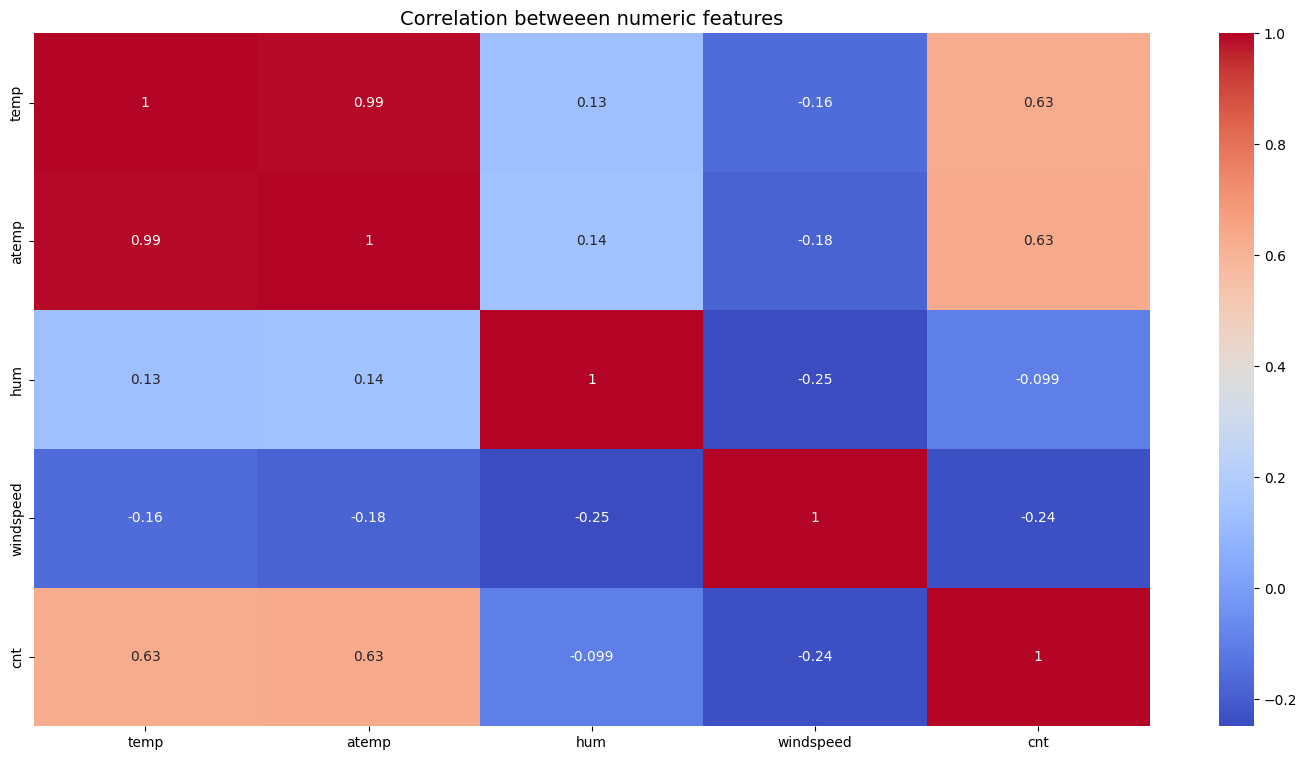

In [145]:
num_bike = ['temp',"atemp","hum","windspeed","cnt"]
plt.figure(figsize=(18,9))
plt.title("Correlation betweeen numeric features",fontsize=14)
sns.heatmap(df_b[num_bike].corr(),annot= True,cmap="coolwarm")
plt.show()

In [146]:
df_b.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562   20.319259   23.726322   62.765175   
std      0.500343    0.167266    0.465405    7.506729    8.150308   14.237589   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.811885   16.889713   52.000000   
50%      0.500000    0.000000    1.000000   20.465826   24.368225   62.625000   
75%      1.000000    0.000000    1.000000   26.880615   30.445775   72.989575   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.250000   

        windspeed          cnt  
count  730.000000   730.000000  
mean    12.763620  4508.006849  
std      5.195841  1936.011647  
min      1.500244    22.000000  
25%      9.041650  3169.750000  
50%     12.125325  4548.500000  
75%     15.625589  5966.000000  
max     34.000021  8714.000000

## Preparing Data Modelling

In [147]:
df_b.value_counts()

season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  cnt 
Winter  1   Sept  0        Wed      1           Good        26.035000  29.83065  63.0833  16.374800  7733    1
Fall    0   Aug   0        Fri      1           Good        28.700000  32.98665  76.1250  5.625488   4661    1
                                                            29.041653  32.70210  41.5000  8.416607   4905    1
                                                            29.144153  32.82835  63.0833  12.374632  4866    1
                                                Moderate    28.085000  31.66105  72.2917  9.333636   4153    1
                                                                                                            ..
                           Wed      1           Good        31.433347  34.24915  42.4167  13.417286  4780    1
                                                Moderate    29.998347  33.99685  65.7500  9.084061   3574    1
      

In [148]:
#creating dummy variables
df_b = pd.get_dummies(data=df_b,columns=["season","mnth","weekday"],drop_first=True)
df_b = pd.get_dummies(data=df_b,columns=["weathersit"])

In [149]:
df_b.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate'],
      dtype='object')

In [150]:
df_b.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_Spring  season_Summer  ...  mnth_Sept  weekday_Mon  weekday_Sat  \
0           True          False  ...      False        False         True   
1           True          False  ...      False        False        False   
2           True          False  ...      False         True        False   
3           True          False  ...      False        False        False   
4           True          False  ...      False        False        False   

   weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  weathersit_Bad  \
0        False        False        False        False           False   
1         True        False        False        False           False   
2        False        False        False        False           False   
3        False        False         True        False           False   
4        False        False        False         True           False   

   weathersit_Good  weathersit_Moderate  
0            False                 True  
1            False                 True  
2             True                False  
3             True                False  
4             True                False  

[5 rows x 31 columns]

In [151]:
col=['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate']
df_b[col] = df_b[col].astype(int)
df_b.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_Spring  season_Summer  ...  mnth_Sept  weekday_Mon  weekday_Sat  \
0              1              0  ...          0            0            1   
1              1              0  ...          0            0            0   
2              1              0  ...          0            1            0   
3              1              0  ...          0            0            0   
4              1              0  ...          0            0            0   

   weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  weathersit_Bad  \
0            0            0            0            0               0   
1            1            0            0            0               0   
2            0            0            0            0               0   
3            0            0            1            0               0   
4            0            0            0            1               0   

   weathersit_Good  weathersit_Moderate  
0                0                    1  
1                0                    1  
2                1                    0  
3                1                    0  
4                1                    0  

[5 rows x 31 columns]

Converting boolean into integer type

# Splitting into train/test data

In [152]:
#y to contain only target variable
y=df_b.pop('cnt')
#x contain remaining variable
X=df_b

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [153]:
X.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   
2   0        0           1   8.050924   9.47025  43.7273  16.636703   
3   0        0           1   8.200000  10.60610  59.0435  10.739832   
4   0        0           1   9.305237  11.46350  43.6957  12.522300   

   season_Spring  season_Summer  season_Winter  ...  mnth_Sept  weekday_Mon  \
0              1              0              0  ...          0            0   
1              1              0              0  ...          0            0   
2              1              0              0  ...          0            1   
3              1              0              0  ...          0            0   
4              1              0              0  ...          0            0   

   weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  \
0            1            0            0            0            0   
1            0            1            0            0            0   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            1   

   weathersit_Bad  weathersit_Good  weathersit_Moderate  
0               0                0                    1  
1               0                0                    1  
2               0                1                    0  
3               0                1                    0  
4               0                1                    0  

[5 rows x 30 columns]

In [154]:
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


In [155]:
vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[vars] = scaler.fit_transform(X_train[vars])

In [156]:
X_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.520548    0.027397    0.669276    0.550874    0.526518    0.654174   
std      0.500067    0.163398    0.470935    0.227231    0.212976    0.143648   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.354221    0.353207    0.544598   
50%      1.000000    0.000000    1.000000    0.575304    0.563297    0.659940   
75%      1.000000    0.000000    1.000000    0.745079    0.698389    0.756977   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed  season_Spring  season_Summer  season_Winter  ...  \
count  511.000000     511.000000     511.000000     511.000000  ...   
mean     0.414873       0.230920       0.258317       0.250489  ...   
std      0.185619       0.421834       0.438138       0.433719  ...   
min      0.000000       0.000000       0.000000       0.000000  ...   
25%      0.281934       0.000000       0.000000       0.000000  ...   
50%      0.384732       0.000000       0.000000       0.000000  ...   
75%      0.526481       0.000000       1.000000       0.500000  ...   
max      1.000000       1.000000       1.000000       1.000000  ...   

       mnth_Sept  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
count  511.00000   511.000000   511.000000   511.000000   511.000000   
mean     0.09002     0.148728     0.150685     0.152642     0.146771   
std      0.28649     0.356169     0.358092     0.359994     0.354224   
min      0.00000     0.000000     0.000000     0.000000     0.000000   
25%      0.00000     0.000000     0.000000     0.000000     0.000000   
50%      0.00000     0.000000     0.000000     0.000000     0.000000   
75%      0.00000     0.000000     0.000000     0.000000     0.000000   
max      1.00000     1.000000     1.000000     1.000000     1.000000   

       weekday_Tue  weekday_Wed  weathersit_Bad  weathersit_Good  \
count   511.000000   511.000000      511.000000       511.000000   
mean      0.131115     0.140900        0.029354         0.624266   
std       0.337857     0.348259        0.168963         0.484786   
min       0.000000     0.000000        0.000000         0.000000   
25%       0.000000     0.000000        0.000000         0.000000   
50%       0.000000     0.000000        0.000000         1.000000   
75%       0.000000     0.000000        0.000000         1.000000   
max       1.000000     1.000000        1.000000         1.000000   

       weathersit_Moderate  
count           511.000000  
mean              0.346380  
std               0.476282  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               1.000000  
max               1.000000  

[8 rows x 30 columns]

In [157]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
683   1        0           1  0.327133  0.322150  0.639330   0.327101   
645   1        1           0  0.403972  0.404998  0.731215   0.419004   
163   0        0           1  0.717562  0.685963  0.509660   0.708724   
360   0        0           1  0.331287  0.326273  0.785745   0.415925   
640   1        0           1  0.745598  0.682653  0.817947   0.110593   

     season_Spring  season_Summer  season_Winter  ...  mnth_Sept  weekday_Mon  \
683              0              0              1  ...          0            0   
645              0              0              1  ...          0            1   
163              0              1              0  ...          0            1   
360              1              0              0  ...          0            0   
640              0              0              1  ...          0            0   

     weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  \
683            0            0            1            0            0   
645            0            0            0            0            0   
163            0            0            0            0            0   
360            0            0            0            1            0   
640            0            0            0            0            1   

     weathersit_Bad  weathersit_Good  weathersit_Moderate  
683               0                0                    1  
645               0                0                    1  
163               0                1                    0  
360               0                0                    1  
640               0                0                    1  

[5 rows x 30 columns]

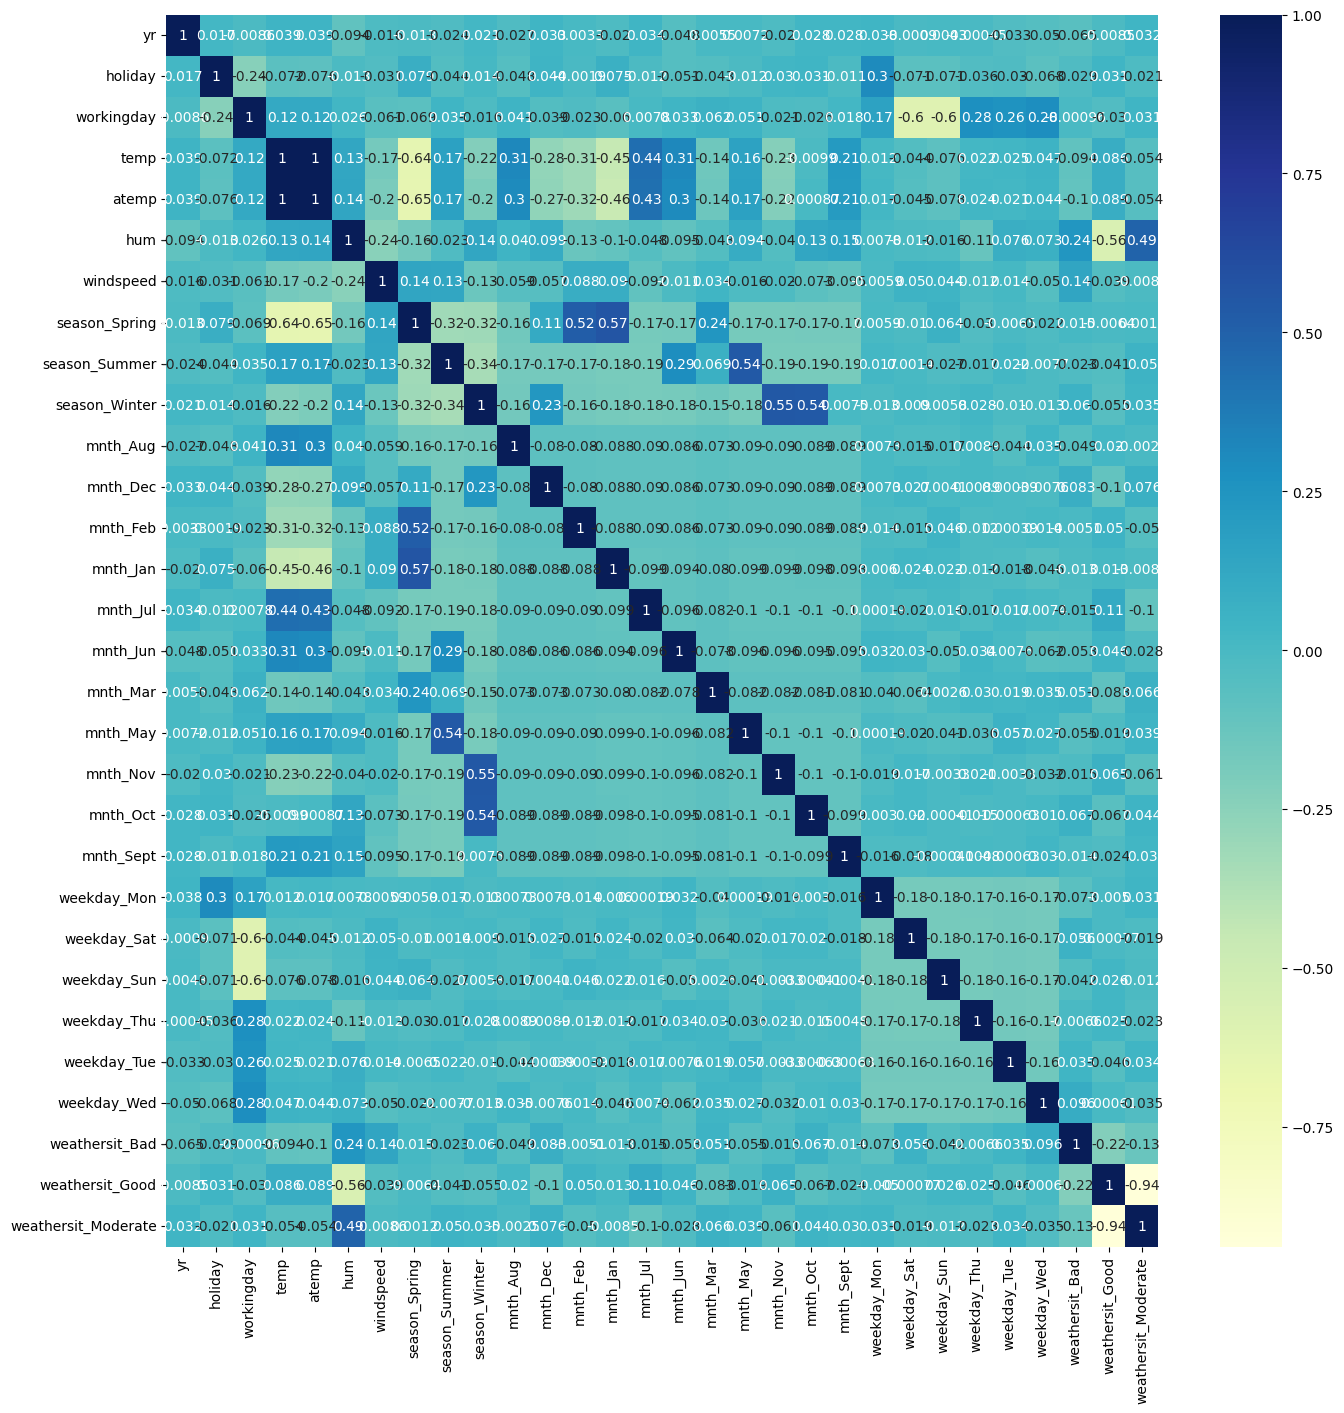

In [158]:
plt.figure(figsize = (16, 16))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Build Model

In [159]:
lr = LinearRegression()
lr.fit(X_train,y_train)
rfe=RFE(lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [160]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.False_, np.int64(4)),
 ('atemp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_Spring', np.True_, np.int64(1)),
 ('season_Summer', np.False_, np.int64(15)),
 ('season_Winter', np.True_, np.int64(1)),
 ('mnth_Aug', np.False_, np.int64(8)),
 ('mnth_Dec', np.True_, np.int64(1)),
 ('mnth_Feb', np.False_, np.int64(6)),
 ('mnth_Jan', np.False_, np.int64(5)),
 ('mnth_Jul', np.False_, np.int64(3)),
 ('mnth_Jun', np.False_, np.int64(11)),
 ('mnth_Mar', np.False_, np.int64(16)),
 ('mnth_May', np.False_, np.int64(7)),
 ('mnth_Nov', np.True_, np.int64(1)),
 ('mnth_Oct', np.False_, np.int64(14)),
 ('mnth_Sept', np.False_, np.int64(2)),
 ('weekday_Mon', np.False_, np.int64(10)),
 ('weekday_Sat', np.True_, np.int64(1)),
 ('weekday_Sun', np.True_, np.int64(1)),
 ('weekday_Thu', np.False_, np.int64(13)),
 ('weekday_Tue', np

In [161]:
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lr = sm.OLS(y_train, X_train_sm).fit()
    print(lr.summary())
    return lr

In [162]:
# Calculate VIFs and print them 
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [163]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Nov', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate'],
      dtype='object')

In [164]:
X_train.columns[~rfe.support_]

Index(['temp', 'season_Summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [165]:
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Nov', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate']]

In [166]:
X_train_rfe.shape

(511, 15)

### Model - A

In [168]:
#Selected columns for Model A - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Nov', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.0
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          2.92e-183
Time:                        10:58:42   Log-Likelihood:                -4136.1
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     497   BIC:                             8360.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1450.1081    

### Model-B

In [169]:
#Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Nov', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.0
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          2.92e-183
Time:                        10:59:45   Log-Likelihood:                -4136.1
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     497   BIC:                             8360.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1402.1617    

### Model- C

In [170]:
#Dropping the variable weekday_Sun as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Nov', 'weekday_Sat','weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.4
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          5.07e-184
Time:                        11:01:31   Log-Likelihood:                -4137.1
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     498   BIC:                             8355.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1606.8204    

### Model- D

In [171]:
#Dropping the variable weathersit_Good as it has high VIF
cols = ['yr', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Nov', 'weekday_Sat','weathersit_Bad',
       'weathersit_Moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.4
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          5.07e-184
Time:                        11:03:14   Log-Likelihood:                -4137.1
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     498   BIC:                             8355.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2940.6564    

### Model-E

In [173]:
#Dropping the variable hum as it has high VIF
cols = ['yr', 'workingday', 'atemp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Nov', 'weekday_Sat','weathersit_Bad',
       'weathersit_Moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.6
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          8.24e-183
Time:                        11:04:53   Log-Likelihood:                -4142.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     499   BIC:                             8360.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2273.6692    

### Model-F

In [174]:
#Dropping the variable atemp as it has VIF more than 5
cols = ['yr', 'workingday', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Nov', 'weekday_Sat','weathersit_Bad',
       'weathersit_Moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          2.20e-159
Time:                        11:06:23   Log-Likelihood:                -4200.9
No. Observations:                 511   AIC:                             8424.
Df Residuals:                     500   BIC:                             8470.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4663.5941    

### Model-G

In [ ]:
#Dropping the variable season_Winter as it has VIF more than 5
cols = ['yr', 'workingday', 'windspeed',
       'season_Spring', 'mnth_Dec', 'mnth_Nov', 'weekday_Sat','weathersit_Bad',
       'weathersit_Moderate']

build_model(cols)
get_vif(cols)

VIF less than 5 which is almost accepted. p-value for all the features is almost 0.0 and R2 is 0.78 Hence this model is finalised here to use further.

In [177]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [178]:
#Let us build the finalmodel using sklearn
#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

4726.545426794573 [ 2060.65784237   472.16822465 -1254.57964913 -2643.89308352
  -934.40155687 -1111.83239045   425.85304731 -2419.02439768
  -729.46198932]


## Residual Analysis

In [179]:
y_train_pred = lr.predict(X_train[cols])

In [180]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

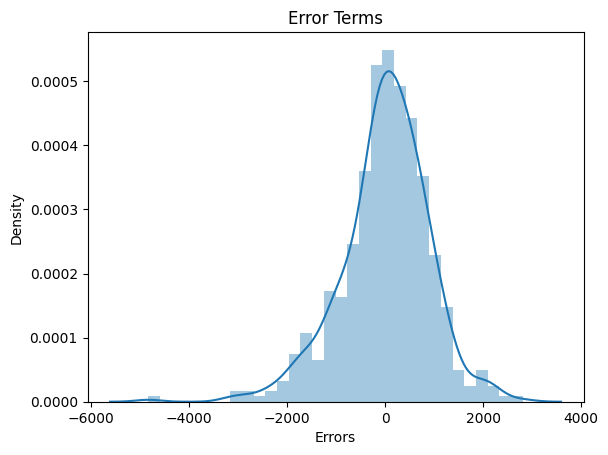

In [181]:
plot_res_dist(y_train, y_train_pred)

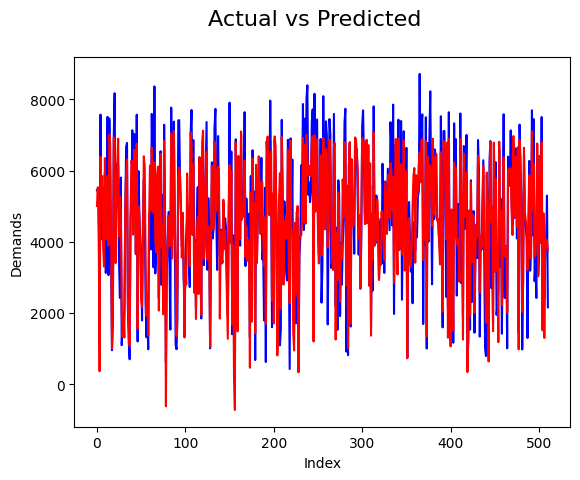

In [182]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 16)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

# Model predictions

In [183]:
# r2_squared value
r2_score(y_train,y_train_pred)

0.7827145470955915

### Prediction for test datasets

In [184]:
#Scale variables in X_test
vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed 
X_test[vars] = scaler.transform(X_test[vars])

In [185]:
cols = ['yr', 'workingday', 'windspeed',
       'season_Spring', 'mnth_Dec', 'mnth_Nov', 'weekday_Sat','weathersit_Bad',
       'weathersit_Moderate']

#Predicting test data values
y_test_pred = lr.predict(X_test[cols])

# Test predictions R Squared Value

In [186]:
r2_score(y_test,y_test_pred)

0.7465620589947639

## Evaluation of model

In [187]:
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.7465620589947639

Text(0, 0.5, 'y_pred')

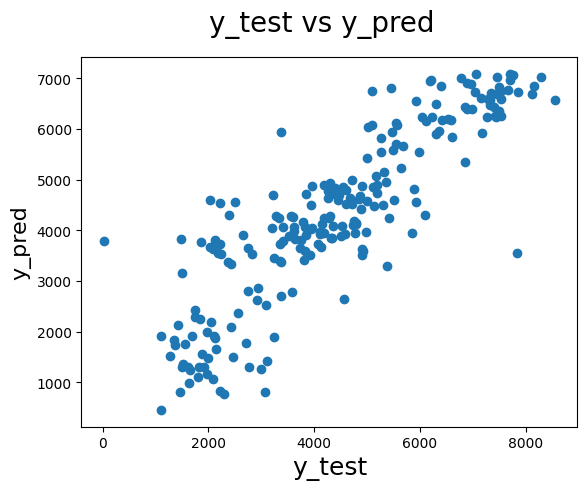

In [190]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 

In [189]:
cols = ['yr', 'workingday', 'windspeed',
       'season_Spring', 'mnth_Dec', 'mnth_Nov', 'weekday_Sat','weathersit_Bad',
       'weathersit_Moderate']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     200.5
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          7.93e-160
Time:                        11:18:06   Log-Likelihood:                -4202.6
No. Observations:                 511   AIC:                             8425.
Df Residuals:                     501   BIC:                             8468.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4726.5454    

# Final Takeaways
Important factors to forecast the demand for shared bicycles

- Holiday, temperature, hum, and wind speed
- Months (January, July, September, November, and December) and season
- Sunday, Year, Weather Conditions (Light Snow, Mist, and Cloud)